<a href="https://colab.research.google.com/github/BethanyJep/kiChanjo/blob/main/World_vaccination_progress.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# World vaccination progress

## Reading our Data


In [ ]:
#Getting the necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import csv
import re #regular expression
from textblob import TextBlob
import string

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics

from collections import Counter 
import nltk
from nltk.corpus import stopwords
from wordcloud import WordCloud, STOPWORDS

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/BethanyJep/COVID-19-Vaccine-Data/main/country_vaccinations.csv')
df.head()

,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines,source_name,source_website
0,Albania,ALB,2021-01-10,0.0,0.0,NaN,NaN,NaN,0.00,0.00,NaN,NaN,Pfizer/BioNTech,Ministry of Health,https://shendetesia.gov.al/covid19-ministria-e...
1,Albania,ALB,2021-01-11,NaN,NaN,NaN,NaN,64.0,NaN,NaN,NaN,22.0,Pfizer/BioNTech,Ministry of Health,https://shendetesia.gov.al/covid19-ministria-e...
2,Albania,ALB,2021-01-12,128.0,128.0,NaN,NaN,64.0,0.00,0.00,NaN,22.0,Pfizer/BioNTech,Ministry of Health,https://shendetesia.gov.al/covid19-ministria-e...
3,Albania,ALB,2021-01-13,188.0,188.0,NaN,60.0,63.0,0.01,0.01,NaN,22.0,Pfizer/BioNTech,Ministry of Health,https://shendetesia.gov.al/covid19-ministria-e...
4,Albania,ALB,2021-01-14,266.0,266.0,NaN,78.0,66.0,0.01,0.01,NaN,23.0,Pfizer/BioNTech,Ministry of Health,https://shendetesia.gov.al/covid19-ministria-e...


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6325 entries, 0 to 6324
Data columns (total 15 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   country                              6325 non-null   object 
 1   iso_code                             5961 non-null   object 
 2   date                                 6325 non-null   object 
 3   total_vaccinations                   4059 non-null   float64
 4   people_vaccinated                    3612 non-null   float64
 5   people_fully_vaccinated              2456 non-null   float64
 6   daily_vaccinations_raw               3427 non-null   float64
 7   daily_vaccinations                   6131 non-null   float64
 8   total_vaccinations_per_hundred       4059 non-null   float64
 9   people_vaccinated_per_hundred        3612 non-null   float64
 10  people_fully_vaccinated_per_hundred  2456 non-null   float64
 11  daily_vaccinations_per_million

In [ ]:
df.shape

(6325, 15)

In [ ]:
df.describe()

,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million
count,4.059000e+03,3.612000e+03,2.456000e+03,3.427000e+03,6.131000e+03,4059.000000,3612.000000,2456.000000,6131.000000
mean,2.205825e+06,1.813410e+06,7.163325e+05,8.409281e+04,5.834689e+04,8.851259,6.864009,3.058371,2568.415430
std,7.720102e+06,5.802202e+06,2.886542e+06,2.535361e+05,1.927478e+05,16.190116,11.141742,6.783997,4286.002346
min,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,0.000000,0.000000,0.000000,0.000000
25%,3.609250e+04,3.399525e+04,1.664625e+04,2.654000e+03,1.121000e+03,0.690000,0.710000,0.330000,355.000000
50%,2.451770e+05,2.260720e+05,8.811350e+04,1.349400e+04,6.657000e+03,3.310000,2.930000,1.220000,1219.000000
75%,1.142525e+06,9.277102e+05,4.412902e+05,5.670650e+04,2.879150e+04,9.035000,7.082500,2.690000,2731.500000
max,1.070603e+08,6.978421e+07,3.745927e+07,4.575496e+06,2.541597e+06,136.940000,87.890000,49.050000,54264.000000


EDA steps
###Problem definition
* Main objective of analysis:
* Main deliverables are:
* Main roles and responsibilities:
* Current status of the data:
* Cost benifit analysis:
###Data preparation
* Transform data into required chunks for analysis
###Data analysis
* Use descriptive statistics and inferential statistics
* Correlation statistics
* Searching, grouping and mathematical models
###Development and represenation of results
* Making graphs, summary tables, maps and diagrams.

In [ ]:
df['country'].nunique()

136

Text(0, 0.5, 'Frequency')

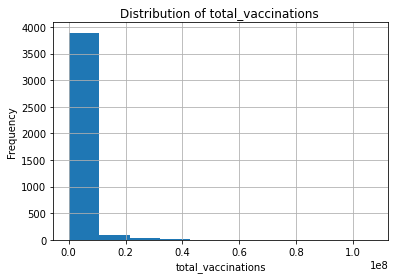

In [ ]:
#Numeric categorical variable
df.hist('total_vaccinations')
plt.title('Distribution of total_vaccinations ')
plt.xlabel('total_vaccinations')
plt.ylabel('Frequency')

In [ ]:
df['vaccines'].unique()

array(['Pfizer/BioNTech', 'Sputnik V', 'Oxford/AstraZeneca',
       'Oxford/AstraZeneca, Sinopharm/Beijing, Sputnik V',
       'Oxford/AstraZeneca, Pfizer/BioNTech',
       'Moderna, Oxford/AstraZeneca, Pfizer/BioNTech', 'Sinovac',
       'Oxford/AstraZeneca, Pfizer/BioNTech, Sinopharm/Beijing, Sputnik V',
       'Oxford/AstraZeneca, Sinovac', 'Sinopharm/Beijing',
       'Moderna, Pfizer/BioNTech', 'Pfizer/BioNTech, Sinovac',
       'Sinopharm/Beijing, Sinopharm/Wuhan, Sinovac', 'Moderna',
       'Moderna, Oxford/AstraZeneca, Pfizer/BioNTech, Sinopharm/Beijing, Sputnik V',
       'Covaxin, Oxford/AstraZeneca',
       'Pfizer/BioNTech, Sinopharm/Beijing',
       'Pfizer/ BioNTech, Sinopharm/Beijing',
       'Oxford/AstraZeneca, Pfizer/BioNTech, Sputnik V',
       'Sinopharm/Beijing, Sputnik V',
       'Oxford/AstraZeneca, Sinopharm/Beijing', 'EpiVacCorona, Sputnik V',
       'Johnson&Johnson',
       'Oxford/AstraZeneca, Pfizer/BioNTech, Sinopharm/Beijing, Sinopharm/Wuhan, Sputnik V',
 

Text(0.5, 1.0, 'total vaccines Distribution')

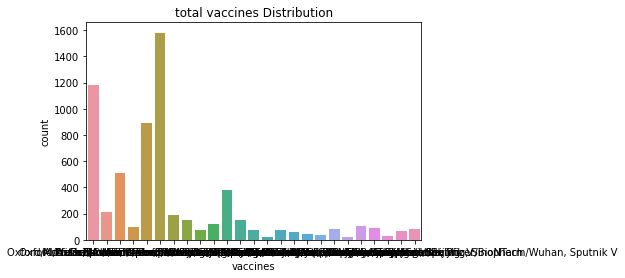

In [ ]:
#Categorical Variable
sns.countplot(x='vaccines', data = df)
plt.title('total vaccines Distribution')

In [ ]:
df.value_counts()

country        iso_code  date        total_vaccinations  people_vaccinated  people_fully_vaccinated  daily_vaccinations_raw  daily_vaccinations  total_vaccinations_per_hundred  people_vaccinated_per_hundred  people_fully_vaccinated_per_hundred  daily_vaccinations_per_million  vaccines                                        source_name                                 source_website                                                                                                                                                    
United States  USA       2021-03-14  107060274.0         69784210.0         37459269.0               1356773.0               2386932.0           32.01                           20.87                          11.20                                7137.0                          Johnson&Johnson, Moderna, Pfizer/BioNTech       Centers for Disease Control and Prevention  https://covid.cdc.gov/covid-data-tracker/#vaccinations                                             